# Pivot table
Las tables dinámicas (pivot tables, inglés) nos permitén cambiar la forma de un dataframe con el fin de mejorar los procesos de analítica. En esencia, lo que nos permite pivot es cambiar la disposición de los datos, pasando de un formato alargado a un formato apaisado. 

Vamos a ver dos métodos en pandas que nos permiten hacer esas operaciones: `pivot()` y `pivot_table()`

## `pivot()`

Este méotodo recibe tres parámetros:
* index: columna que usaremos como índice del nuevo dataframe
* columns: columna que utilizaremos como nuevas columnas del dataframe
* values: columna o columnas de valores con los que llenaremos las celdas del nuevo dataframe

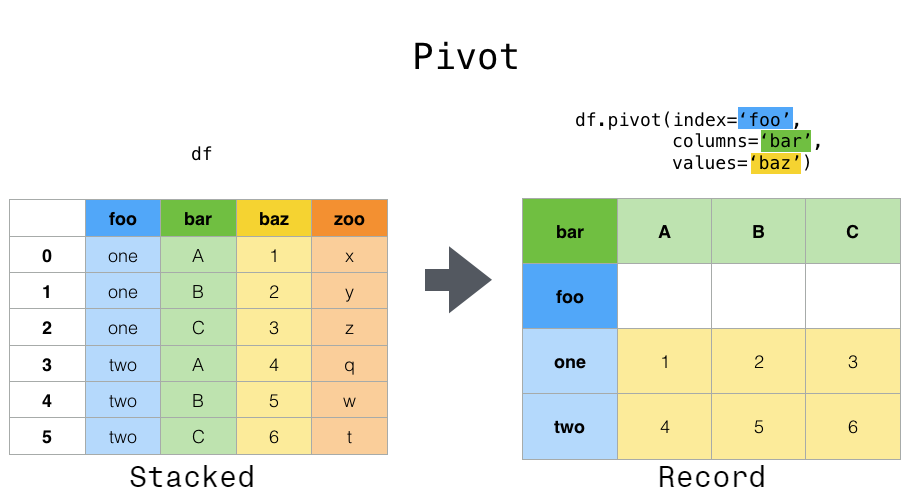

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
data = { "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4),
         "product": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
         "sales": np.random.randint(10, size=12),
         "stock": np.random.randint(20, size=12)}

df=pd.DataFrame(data)

In [23]:
df

,date,product,sales,stock
0,2020-01-03,A,8,16
1,2020-01-04,A,5,14
2,2020-01-05,A,9,12
3,2020-01-03,B,0,14
4,2020-01-04,B,0,10
5,2020-01-05,B,3,16
6,2020-01-03,C,0,18
7,2020-01-04,C,1,18
8,2020-01-05,C,3,3
9,2020-01-03,D,2,12


In [28]:
df.pivot(index='date',columns='product',values='sales')

product,A,B,C,D
date,,,,
2020-01-03,8,0,0,2
2020-01-04,5,0,1,5
2020-01-05,9,3,3,3


In [30]:
# Lo mismo que: df.pivot(index='date',columns='product',values='sales').T
df.pivot(index='product',columns='date',values='sales').T


product,A,B,C,D
date,,,,
2020-01-03,8,0,0,2
2020-01-04,5,0,1,5
2020-01-05,9,3,3,3


In [32]:
df.pivot(index='date',columns='product',values=['sales','stock'])

sales          stock            
product        A  B  C  D     A   B   C   D
date                                       
2020-01-03     8  0  0  2    16  14  18  12
2020-01-04     5  0  1  5    14  10  18  17
2020-01-05     9  3  3  3    12  16   3  12

## `pivot_table()`

Este método los permite hacer lo mismo que `pivot()`, pero es además nos permite hacer agregaciones, utilizando el parámetro **aggfunc**. Hay otros parámetros que permiten al método hacer cosas todavía más chulas.

In [33]:
df.pivot_table(index='product',columns='date',values='sales')

date,2020-01-03,2020-01-04,2020-01-05
product,,,
A,8,5,9
B,0,0,3
C,0,1,3
D,2,5,3


In [34]:
df.pivot_table(index='product',values='sales', aggfunc='count')

,sales
product,
A,3
B,3
C,3
D,3


In [36]:
df.pivot_table(index='product',values='sales', aggfunc='mean')

,sales
product,
A,7.333333
B,1.000000
C,1.333333
D,3.333333


In [38]:
df.pivot_table(index='date',
               values=['sales','stock'],
               aggfunc={'sales':['mean','sum'],
                       'stock':['min','max']})

sales     stock    
            mean sum   max min
date                          
2020-01-03  2.50  10    18  12
2020-01-04  2.75  11    18  10
2020-01-05  4.50  18    16   3

In [39]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
# Contar pasajeros que sobrevivieron por clase y sexo
titanic.pivot_table(index = "sex", 
                    columns = "class", 
                    values = "survived",
                    aggfunc='count')


class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [41]:
# Multiples operaciones con pivot table
titanic.pivot_table(index = "class", 
                    columns = "sex", 
                    values = ["age","survived"],
                    aggfunc ={'age':['mean','max','min'],
                             'survived':'count'})



age                                          survived     
          max             mean               min          count     
sex    female  male     female       male female  male   female male
class                                                               
First    63.0  80.0  34.611765  41.281386   2.00  0.92       94  122
Second   57.0  70.0  28.722973  30.740707   2.00  0.67       76  108
Third    63.0  74.0  21.750000  26.507589   0.75  0.42      144  347

Para más información sobre pivot y otras formas de cambiar la forma de los dataframe, ver la [documentación](https://pandas.pydata.org/docs/user_guide/reshaping.html)